Auto Encoder
1. Encoder , macam zip > biasanya pake CNN karena mengerucutkan
2. Decoder, ini unzipnya > pake anti-CNN 

Kompresi
lossless > datanya gada yg ilang
lossy > ada yg ilang 


In [56]:
#siapin wajah orang
#kompres ke data array yg lebih kecil
#dekompres
#kalo loss mendekati 0, baik

In [57]:
#!unzip /content/bulet_ae.zip
#!unzip /content/kotak_ae.zip

In [58]:
bulet = []
kotak = []

import glob, cv2

for namafile in glob.glob('/content/bulet/*'):
  bulet.append(
      cv2.imread(namafile)/225
  )
for namafile in glob.glob('/content/kotak/*'):
  kotak.append(
      cv2.imread(namafile)/225
  )

In [59]:
import numpy as np

bulet = np.asarray(bulet).astype(float)
kotak = np.asarray(kotak).astype(float)

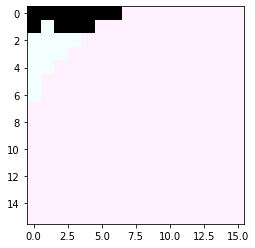

In [60]:
import matplotlib.pyplot as plt

plt.imshow(bulet[0])

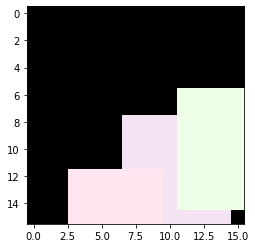

In [61]:
plt.imshow(kotak[0])

In [62]:
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose, Conv2D
from keras.layers.serialization import activation
from keras.layers import Reshape, Flatten, Dense
from keras.models import Sequential

size = 16
latent = size*2
encoder = Sequential()
encoder.add(Conv2D(8,(3,3), input_shape=kotak.shape[1:], padding='same', strides=2, activation='relu'))
encoder.add(Conv2D(16,(3,3), padding='same', strides=2, activation='relu'))

decoder_1 = Sequential()
decoder_1.add(Conv2DTranspose(16,(3,3), padding='same', strides=2, activation='relu'))
decoder_1.add(Conv2DTranspose(8, (3,3), padding='same', strides=2, activation='relu'))
decoder_1.add(Conv2D(3, (3,3), padding='same', activation='sigmoid'))

decoder_2 = Sequential()
decoder_2.add(Conv2DTranspose(16,(3,3), padding='same', strides=2, activation='relu'))
decoder_2.add(Conv2DTranspose(8, (3,3), padding='same', strides=2, activation='relu'))
decoder_2.add(Conv2D(3, (3,3), padding='same', activation='sigmoid'))

In [63]:
from keras.models import Model
#AutoEncoder 1
class AE1(Model):
  def __init__(self):
    super(AE1, self).__init__()
    self.encoder = encoder
    self.decoder_1 = decoder_1
  def call(self,x):
    _ = self.encoder(x)
    _ = self.decoder_1(_)
    return _

In [64]:
ae1 = AE1()
ae1.compile(optimizer='adam', loss='mse')
ae1.predict(kotak[0:1])

1/1 [==============================] - 0s 125ms/step


array([[[[0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.49971035, 0.50072175, 0.50010747],
         [0.50023884, 0.50044847, 0.49995586],
         [0.50109535, 0.5003896 , 0.49965194],
         [0.5005263 , 0.4995287 , 0.49999264],
         [0.49993053, 0.50093424, 0.4997268 ],
         [0.5004524 , 0.5010176 , 0.4989136 ],
         [0.5008847 , 0.50171745, 0.49966124],
         [0.5009457 , 0.49898243, 0.5000637 ],
         [0.50089043, 0.49921152, 0.49907827]],

        [[0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0.5       , 0.5       , 0.5       ],
         [0

In [65]:
#AutoEncoder 2
class AE2(Model):
  def __init__(self):
    super(AE2, self).__init__()
    self.decoder_2 = decoder_2
  def call(self,x):
    _ = ae1.encoder(x)
    _ = self.decoder_2(_)
    return _

In [66]:
ae2 = AE2()
ae2.compile(optimizer='adam', loss='mse')
ae2.predict(bulet[0:1])

1/1 [==============================] - 0s 139ms/step


array([[[[0.50237906, 0.49997333, 0.49922994],
         [0.50018036, 0.5025286 , 0.49920085],
         [0.5007931 , 0.5007911 , 0.50010616],
         [0.5013015 , 0.50508356, 0.4967053 ],
         [0.50086683, 0.4992056 , 0.4968823 ],
         [0.5000859 , 0.50282115, 0.50250906],
         [0.50224274, 0.5000693 , 0.5007761 ],
         [0.50043315, 0.5075725 , 0.49717936],
         [0.49926078, 0.5000145 , 0.4980065 ],
         [0.4981256 , 0.49988005, 0.5031639 ],
         [0.50281054, 0.49918804, 0.50036067],
         [0.50143856, 0.50835323, 0.49836984],
         [0.49635234, 0.5011771 , 0.49985796],
         [0.4939225 , 0.49795964, 0.5014492 ],
         [0.5044099 , 0.504037  , 0.5002584 ],
         [0.50104755, 0.5020099 , 0.503475  ]],

        [[0.4983679 , 0.5039078 , 0.49911585],
         [0.50410086, 0.5013698 , 0.5011702 ],
         [0.5075091 , 0.50728613, 0.49944845],
         [0.51208866, 0.5101508 , 0.49556673],
         [0.50207686, 0.49680692, 0.50885   ],
         [0

In [ ]:
ae1.fit(kotak, kotak, batch_size=2, epochs=10, validation_split= 0.2)

Epoch 1/10
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0109 - val_loss: 0.0027
Epoch 2/10
3204/4000 [=======================>......] - ETA: 1s - loss: 0.0022

In [ ]:
ae2.fit(bulet, bulet, batch_size=2, epochs=10, validation_split= 0.2)

In [ ]:
sidik = ae1.encoder(kotak[0:1])
y_pred = ae2.decoder_2(sidik)
plt.imshow(y_pred[0])